In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
coffee2 = pd.read_csv('coffee_cleaned.csv')

In [4]:
#drop the 'Unnamed: 0' column that just contains 0 for all rows
coffee2 = coffee2.drop(columns=['Unnamed: 0'])

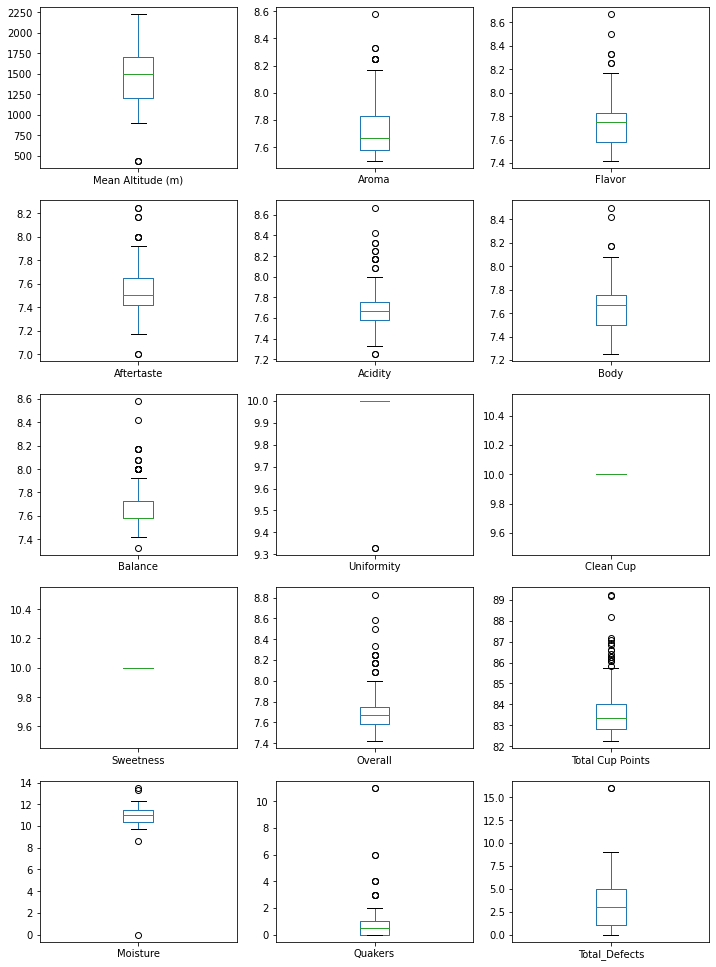

In [5]:
#create box plots of applicable data


coffee2.plot(kind='box', subplots=True, layout=(10,3), 
        sharex=False, sharey=False, figsize=(12,35))

plt.show()

In [6]:
#create pandas df called 'coffee'

coffee = pd.read_csv('arabica.csv')

Text(0.5, 0, 'Count')

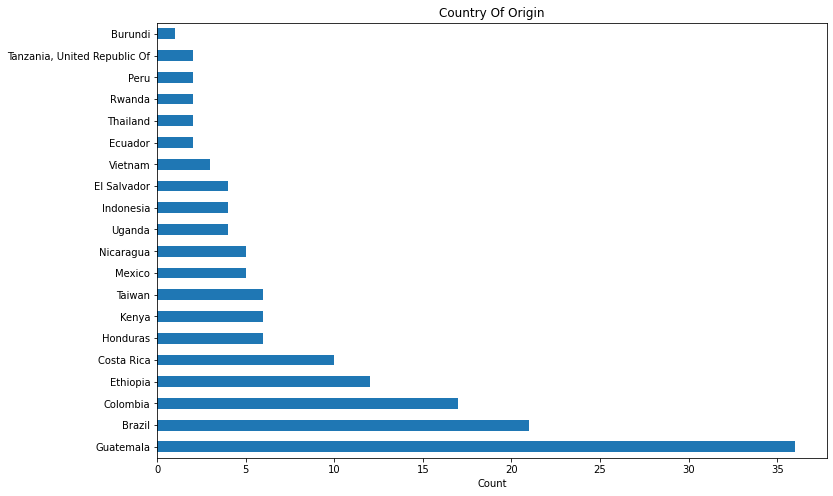

In [7]:
#create bar graph of how many coffee beans we have from each country

coffee['Country of Origin'].value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Country Of Origin')
plt.xlabel('Count')

In [8]:
#lets look at the mean Total Cup Points of each country

country_cup_points_means = coffee.groupby('Country of Origin')[['Total Cup Points']].mean().sort_values(by='Total Cup Points', ascending=False)
country_cup_points_means

,Total Cup Points
Country of Origin,
Ethiopia,86.020833
Taiwan,85.875000
Kenya,85.276667
"Tanzania, United Republic Of",84.665000
Burundi,84.080000
Vietnam,84.056667
Colombia,84.010000
Rwanda,83.500000
Uganda,83.500000


In [9]:
## How does Coffee Variety affect Total Cup Points?

Text(0.5, 0, 'Count')

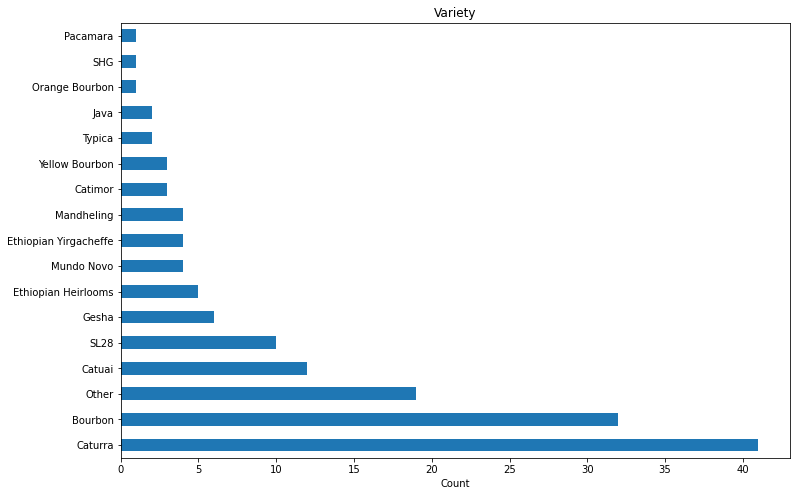

In [10]:
coffee['Variety'].value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Variety')
plt.xlabel('Count')

In [11]:
## How Does Coffee Variety Affect Total_Defects and Quakers?

In [12]:
mean_variety = coffee2.groupby("Variety").mean().sort_values("Total_Defects")

Text(0, 0.5, 'Defects plus quakers')

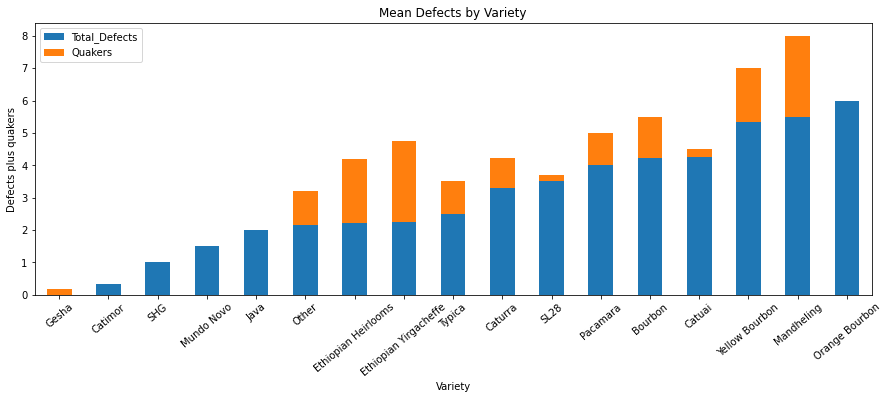

In [13]:
mean_variety.plot.bar(y=['Total_Defects','Quakers'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Defects by Variety")
plt.ylabel('Defects plus quakers')

Text(0, 0.5, 'Total Cup Points')

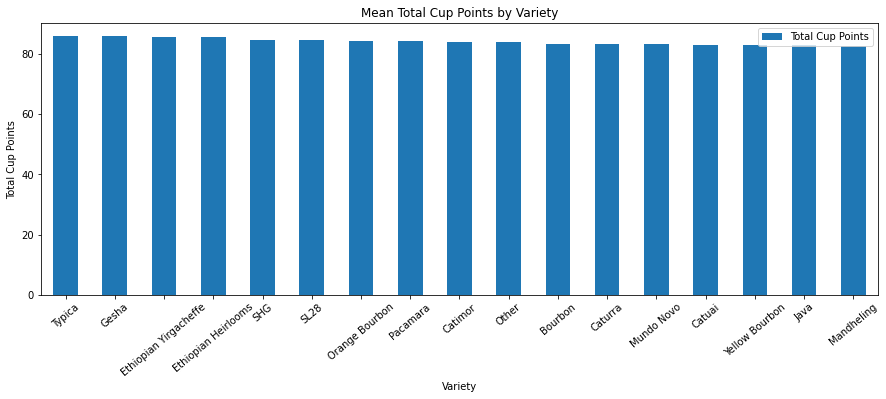

In [14]:
mean_variety2 = coffee2.groupby("Variety").mean().sort_values("Total Cup Points",ascending=False)
mean_variety2.plot.bar(y=['Total Cup Points'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Total Cup Points by Variety")
plt.ylabel('Total Cup Points')

In [15]:
chart2 = pd.crosstab(coffee2['Variety'],coffee2['Coffee_Grade']).apply(lambda r: r/r.sum(), axis=1)
chart2

Coffee_Grade,Exchange,Premium,Specialty,Standard Grade
Variety,,,,
Bourbon,0.000000,0.468750,0.343750,0.1875
Catimor,0.000000,0.000000,1.000000,0.0000
Catuai,0.166667,0.083333,0.250000,0.5000
Caturra,0.097561,0.536585,0.365854,0.0000
Ethiopian Heirlooms,0.000000,0.400000,0.400000,0.2000
Ethiopian Yirgacheffe,0.000000,0.000000,0.250000,0.7500
Gesha,0.000000,0.166667,0.833333,0.0000
Java,0.000000,0.000000,1.000000,0.0000
Mandheling,0.000000,0.500000,0.000000,0.5000


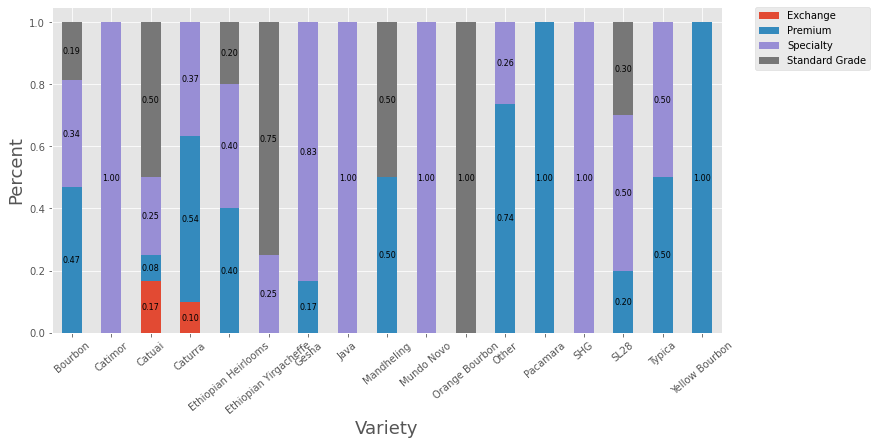

In [16]:
plt.style.use('ggplot')
ax = chart2.plot(kind='bar', stacked=True, figsize=(12, 6), rot=40, xlabel='Variety', ylabel='Percent')
   
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

     # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Percent", fontsize=18)
ax.set_xlabel("Variety", fontsize=18)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 10.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='Mean Altitude (m)', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Aroma', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Flavor', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Aftertaste', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Acidity', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Body', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Balance', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Uniformity', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Clean Cup', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Sweetness', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Overall', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Total Cup Points', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Quakers', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xla

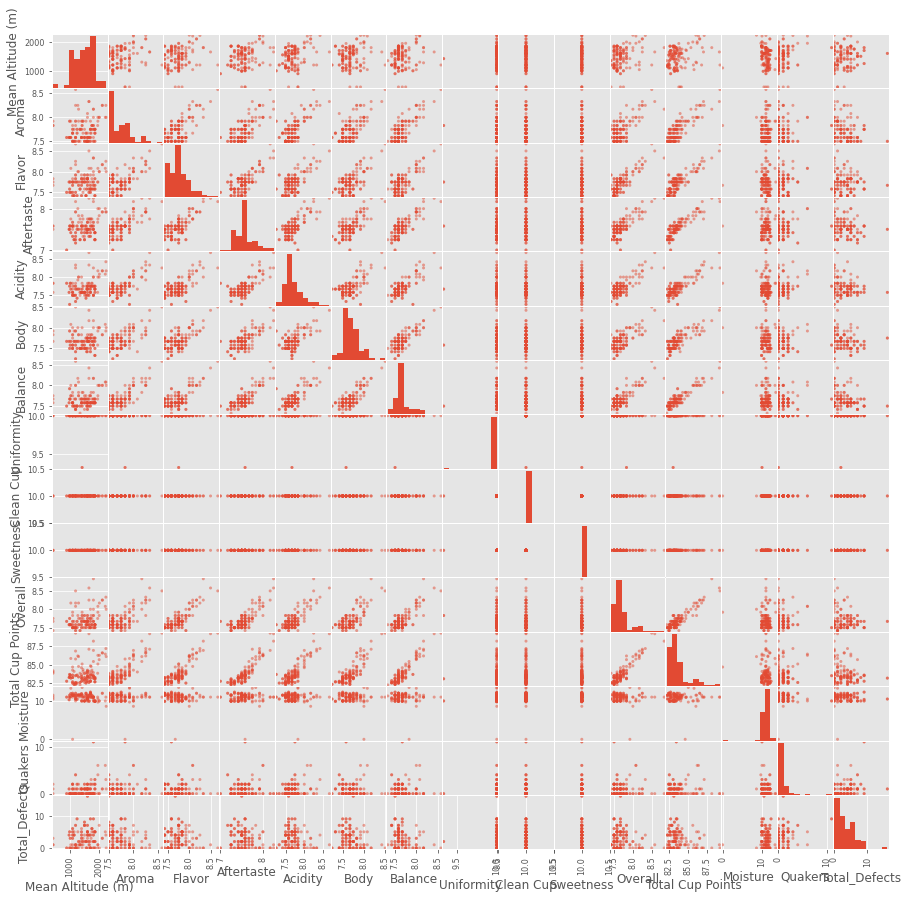

In [17]:
#plot the scatter matrix to see 
pd.plotting.scatter_matrix(coffee2, figsize=(15,15))

In [18]:
cormat = coffee2.corr()
round(cormat,2)

,Mean Altitude (m),Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture,Quakers,Total_Defects
Mean Altitude (m),1.00,0.19,0.21,0.26,0.30,0.09,0.18,0.02,NaN,NaN,0.28,0.25,-0.13,0.24,0.13
Aroma,0.19,1.00,0.65,0.70,0.70,0.65,0.79,-0.06,NaN,NaN,0.70,0.85,-0.01,-0.00,-0.28
Flavor,0.21,0.65,1.00,0.70,0.66,0.63,0.70,-0.01,NaN,NaN,0.82,0.85,-0.07,0.02,-0.07
Aftertaste,0.26,0.70,0.70,1.00,0.68,0.69,0.81,-0.02,NaN,NaN,0.78,0.88,0.03,0.07,-0.18
Acidity,0.30,0.70,0.66,0.68,1.00,0.59,0.74,0.02,NaN,NaN,0.78,0.85,-0.06,0.14,-0.15
Body,0.09,0.65,0.63,0.69,0.59,1.00,0.79,0.06,NaN,NaN,0.72,0.83,-0.09,-0.07,-0.23
Balance,0.18,0.79,0.70,0.81,0.74,0.79,1.00,0.10,NaN,NaN,0.81,0.92,-0.03,0.00,-0.29
Uniformity,0.02,-0.06,-0.01,-0.02,0.02,0.06,0.10,1.00,NaN,NaN,-0.06,0.06,0.09,0.07,0.05
Clean Cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweetness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
